# Lower Back Pain Prediction with Decision Classifier Tree and Logistic Regression

![](https://media.giphy.com/media/2XflxzjlPftx97UOB2w/giphy.gif)

## Problem

In this Kaggle Notebook we would try to answer the following question: **given a set of data in several health factors, is it possible to predict lower back pain?**

## Proposed Solution

We would make use of **Normalization**, **Decision Tree Classifier** to evaluate feature importance, and **Logistic Regression** to first build our prediction model. Later, we would find out the coefficients of the independent variables, check accuracy metrics and visualize true/false positives and true/false negatives.

## Importing Libraries and Packages

### Visualization
* Matplotlib
* Seaborn

### Data Processing
* Numpy
* Pandas

### Regression
* Sklearn

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report,plot_confusion_matrix
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/lower-back-pain-symptoms-dataset/Dataset_spine.csv


## Exploratory Analysis

**First steps**
1. Importing the dataset
2. Finding out about its columns, shape, and dropping the last column
3. Visualizing the top 5 rows of the data

In [2]:
df=pd.read_csv('../input/lower-back-pain-symptoms-dataset/Dataset_spine.csv')
df=pd.DataFrame(df)
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [3]:
df.columns

Index(['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9',
       'Col10', 'Col11', 'Col12', 'Class_att', 'Unnamed: 13'],
      dtype='object')

In [4]:
df.shape

(310, 14)

In [5]:
df.drop(['Unnamed: 13'], axis=1, inplace=True)

In [6]:
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


The default columns' names don't gives us a lot of information, so we are renaming them with more descriptive headers. 

In [7]:
columnas=['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius',
          'degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt'
          'sacrum_angle','scoliosis_slope','result']

In [8]:
df=df.rename(columns={'Col1':'pelvic_incidence', 'Col2':'pelvic tilt', 'Col3':'lumbar_lordosis_angle',
                      'Col4':'sacral_slope', 'Col5':'pelvic_radius', 'Col6':'degree_spondylolisthesis',
                      'Col7':'pelvic_slope', 'Col8':'direct_tilt', 'Col9':'thoracic_slope',
       'Col10':'cervical_tilt', 'Col11':'sacrum_angle', 'Col12':'scoliosis_slope', 'Class_att':'result'})
df.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,result
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


Finding if there are null values in the dataset.

In [9]:
df.isna().sum()

pelvic_incidence            0
pelvic tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
result                      0
dtype: int64

Changing the qualitative values to quantitative ones of our model

In [10]:
df['result'][df['result']=='Abnormal']=1
df['result'][df['result']=='Normal']=0
df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,result
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1


Now, we are creating a simple normalization function. You can see that the last column would stay the same because it will serve as our dependent variable.

In [11]:
def normalize(dataset):
    DSNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))*20
    DSNorm["result"]=dataset["result"]
    return DSNorm

Our normalized dataset. Later, we are dividing our columns into independent and dependent variables. 

In [12]:
dfnorm=normalize(df)
dfnorm.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,result
0,7.113758,10.397997,4.583599,5.017146,6.149223,0.502968,14.891089,3.727912,12.210122,16.902297,3.137227,19.555946,1
1,2.490021,5.935662,1.971567,2.892587,9.532978,0.727299,8.275668,3.944153,17.083394,19.926010,4.617556,4.876236,1
2,8.233330,10.278646,6.459893,6.153211,7.721938,0.350458,9.475007,13.330664,17.008188,19.668842,2.960515,6.543327,1
3,8.323021,11.148278,5.425200,5.788717,6.836530,1.036761,7.354814,11.127204,9.229217,8.975801,2.279788,6.334827,1
4,4.545437,5.789586,2.562574,4.940441,8.191586,0.883455,10.850477,19.158795,14.515147,3.762369,8.949005,9.594223,1


In [13]:
x=dfnorm.drop('result', axis = 1).values
y=dfnorm['result']

In [14]:
y=y.astype(int)

Printing the shape to make sure the X and Y values aligned correctly

In [15]:
print("X:",x.shape)
print("Y:",y.shape)

X: (310, 12)
Y: (310,)


In [16]:
featurest=['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius',
          'degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt'
          'sacrum_angle','scoliosis_slope']

Creating our **Decision Tree Classifier** in order to extract feature importance

[Text(1466.5855263157894, 2075.5636363636363, 'degree_spondylolisthesis <= 1.206\ngini = 0.437\nsamples = 310\nvalue = [100, 210]'),
 Text(1053.592105263158, 1877.8909090909092, 'pelvic_radius <= 11.877\ngini = 0.479\nsamples = 161\nvalue = [97, 64]'),
 Text(638.7631578947369, 1680.2181818181818, 'sacral_slope <= 5.034\ngini = 0.499\nsamples = 111\nvalue = [53, 58]'),
 Text(337.7368421052632, 1482.5454545454545, 'scoliosis_slope <= 19.052\ngini = 0.444\nsamples = 75\nvalue = [25, 50]'),
 Text(279.0, 1284.8727272727274, 'scoliosis_slope <= 4.033\ngini = 0.408\nsamples = 70\nvalue = [20, 50]'),
 Text(117.47368421052632, 1087.2, 'degree_spondylolisthesis <= 0.549\ngini = 0.473\nsamples = 13\nvalue = [8, 5]'),
 Text(58.73684210526316, 889.5272727272727, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(176.21052631578948, 889.5272727272727, 'thoracic_slope <= 18.527\ngini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(117.47368421052632, 691.8545454545454, 'direct_tilt <= 16.419\ngini = 0.

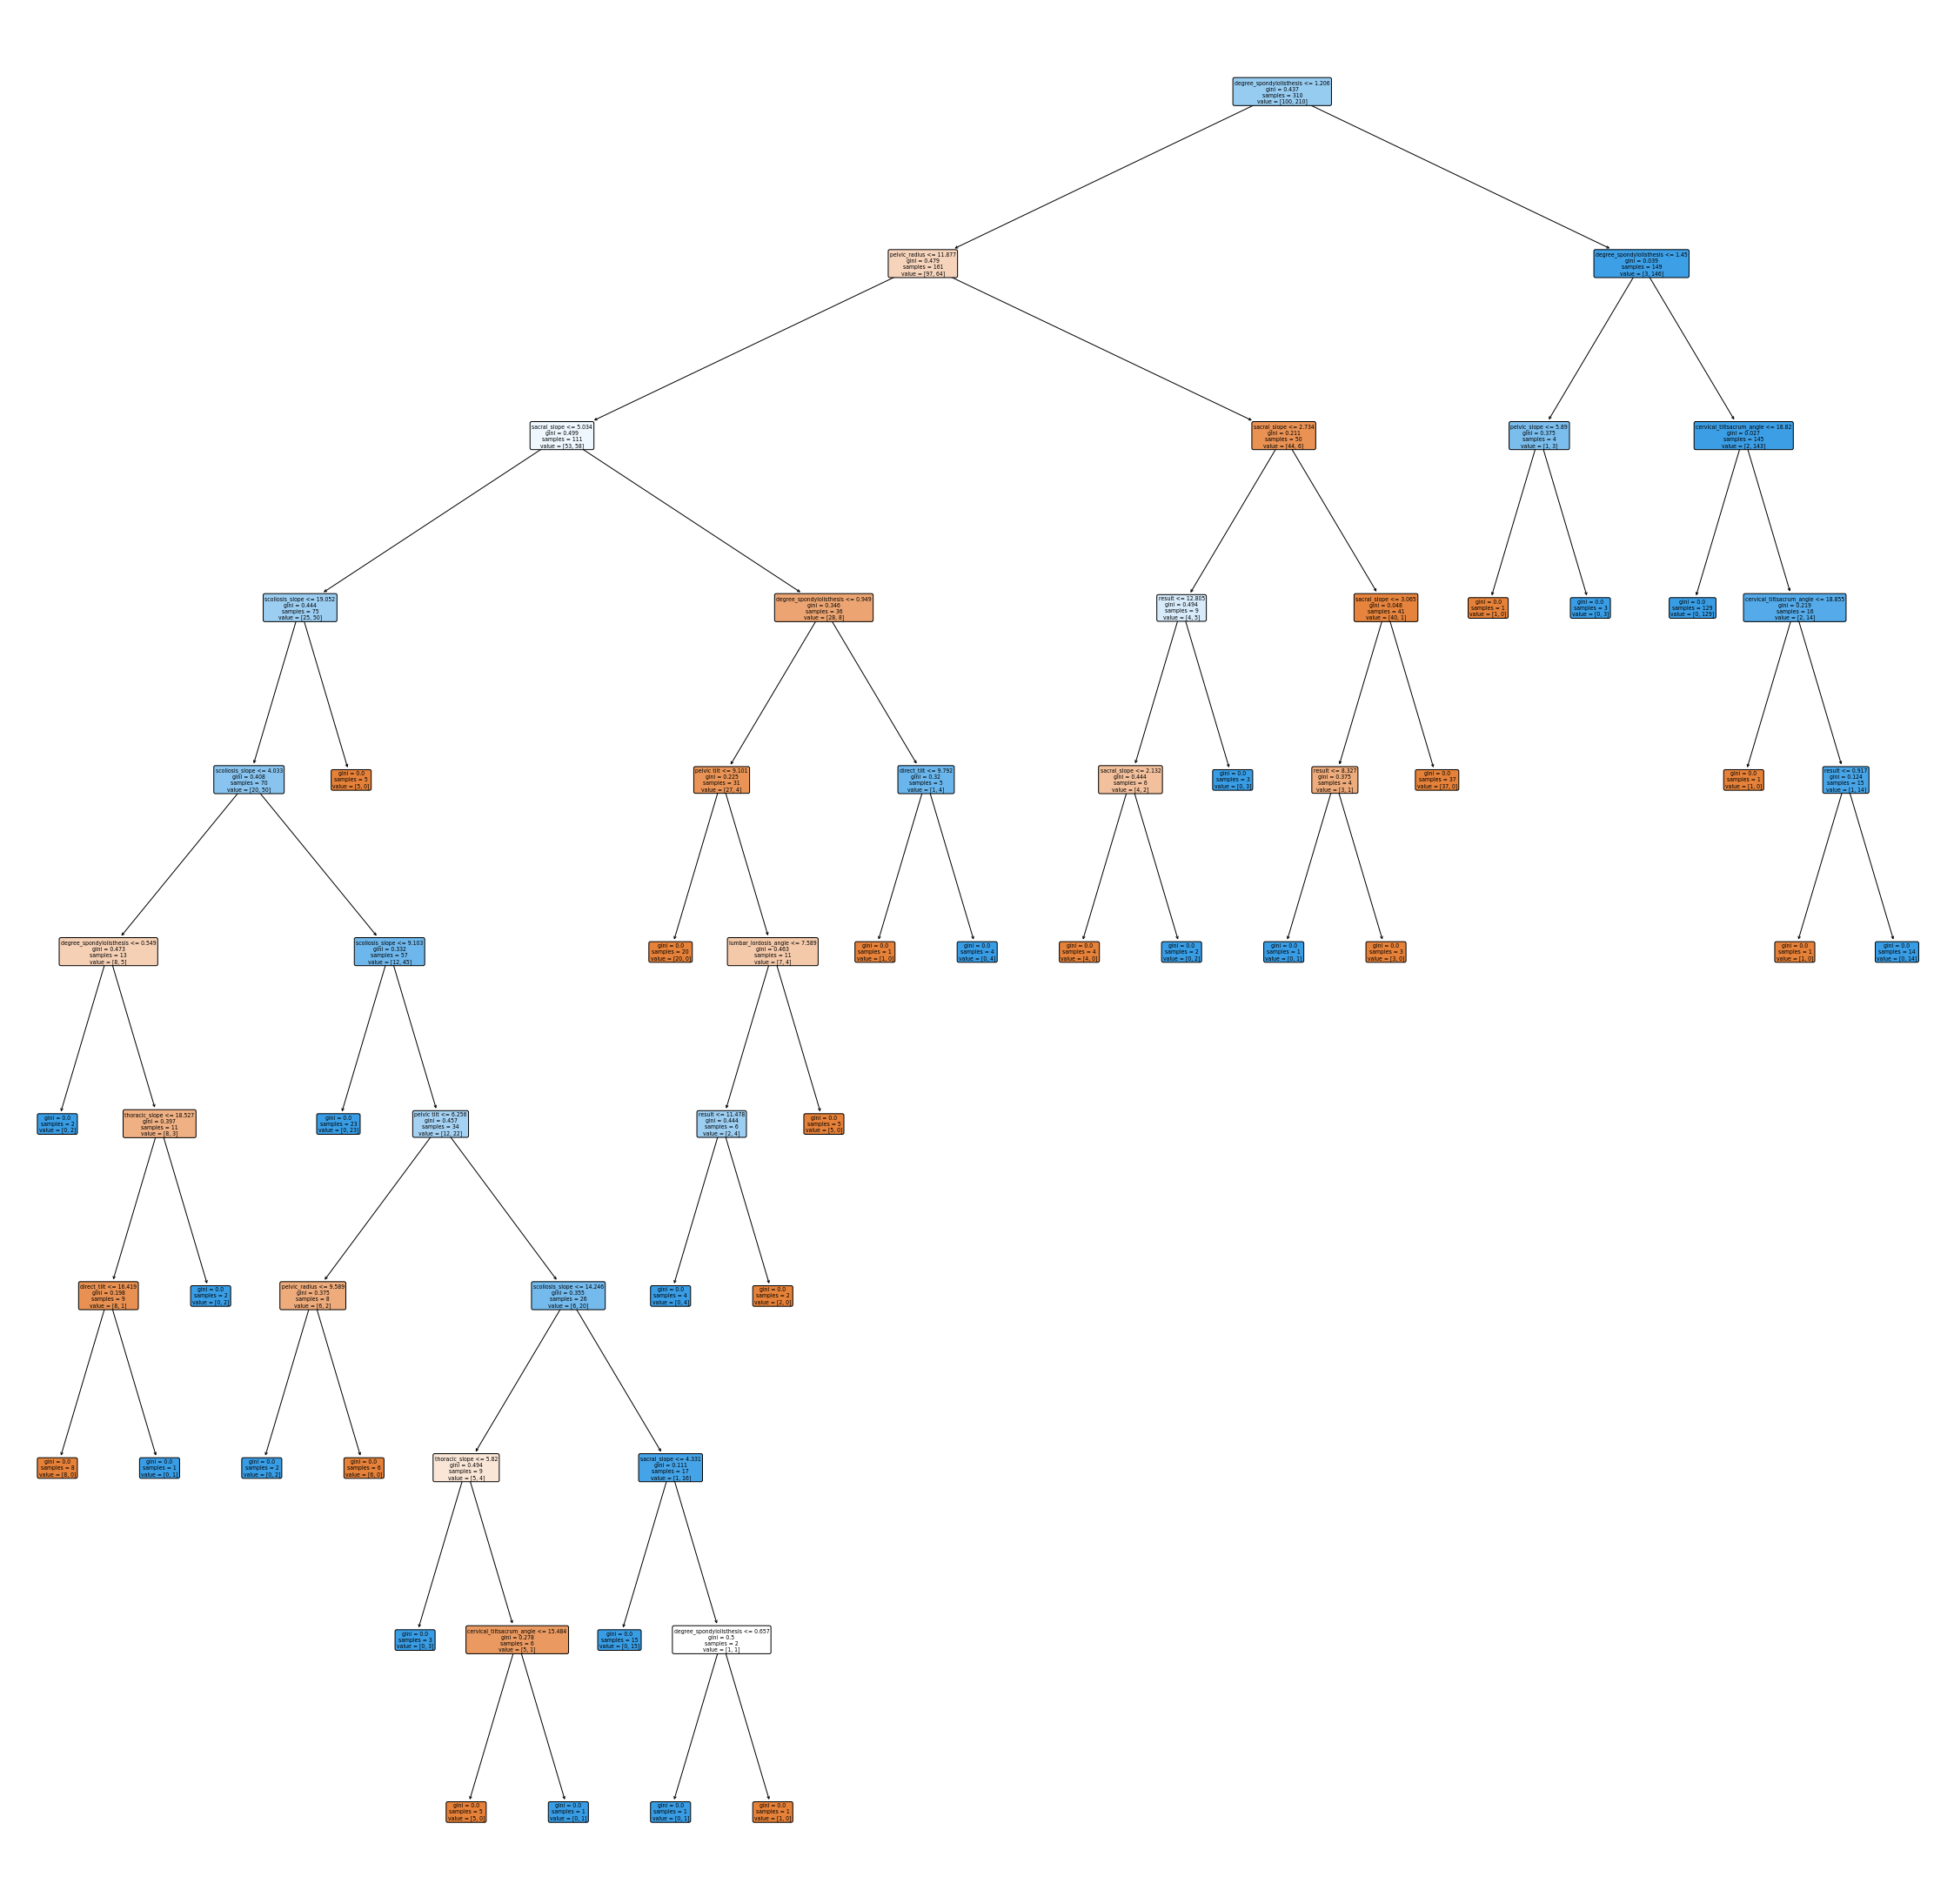

In [17]:
from sklearn.datasets import load_iris
from sklearn import tree
plt.figure(figsize=(40,40))
xt, yt = load_iris(return_X_y=True)
dt = DecisionTreeClassifier()
dt = dt.fit(x, y)
tree.plot_tree(dt,feature_names=columnas,filled=True,rounded=True)


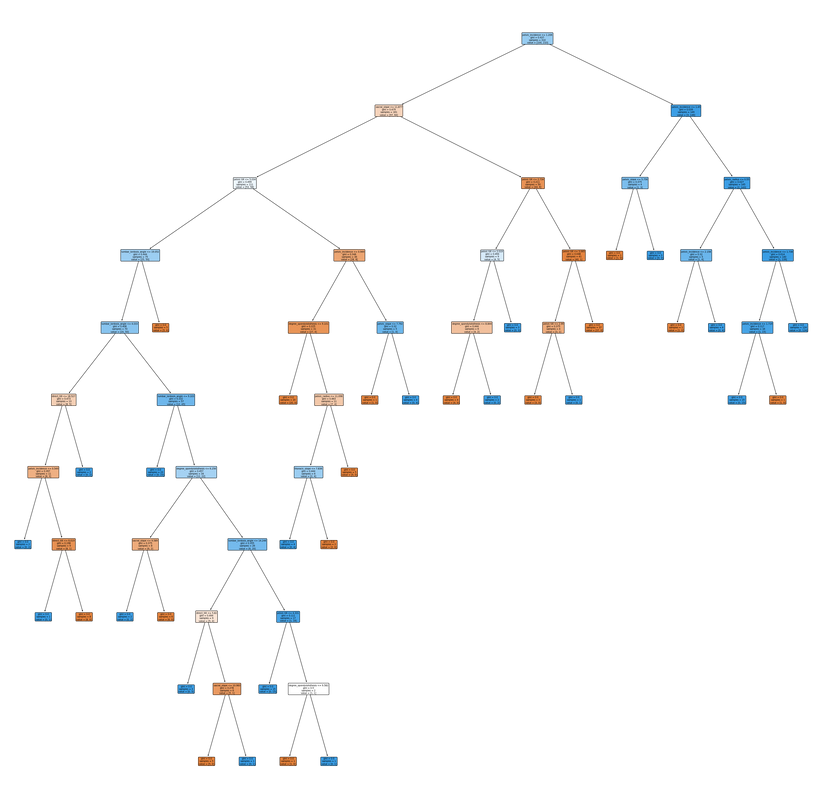

Importance of each feature in the dataset

In [18]:
feat_name = []
importance = []

for i,column in enumerate(dfnorm.drop('result', axis = 1)):
    print('The Feature Importance for {} is : {}'.format(column.capitalize(), dt.feature_importances_[i]))
    
    feat_name.append(column)
    importance.append(dt.feature_importances_[i])

The Feature Importance for Pelvic_incidence is : 0.0
The Feature Importance for Pelvic tilt is : 0.038199937317584365
The Feature Importance for Lumbar_lordosis_angle is : 0.017893217893217895
The Feature Importance for Sacral_slope is : 0.13119041141982327
The Feature Importance for Pelvic_radius is : 0.10459270859146629
The Feature Importance for Degree_spondylolisthesis is : 0.439815771668738
The Feature Importance for Pelvic_slope is : 0.011071428571428572
The Feature Importance for Direct_tilt is : 0.02493121693121693
The Feature Importance for Thoracic_slope is : 0.03958874458874459
The Feature Importance for Cervical_tilt is : 0.027640394088669997
The Feature Importance for Sacrum_angle is : 0.10742272977567094
The Feature Importance for Scoliosis_slope is : 0.057653439153439165


Visualizing our feature importance

In [19]:
fi_df=zip(feat_name,importance)
fi_df=pd.DataFrame(fi_df,columns=["Feature","Score"])
fi_df

,Feature,Score
0,pelvic_incidence,0.000000
1,pelvic tilt,0.038200
2,lumbar_lordosis_angle,0.017893
3,sacral_slope,0.131190
4,pelvic_radius,0.104593
5,degree_spondylolisthesis,0.439816
6,pelvic_slope,0.011071
7,direct_tilt,0.024931
8,thoracic_slope,0.039589
9,cervical_tilt,0.027640


Feature Importance in descending order according to score

In [20]:
fi_df=fi_df.sort_values('Score', ascending = False).reset_index()
columns_re=fi_df['Feature'][0:10]
fi_df

,index,Feature,Score
0,5,degree_spondylolisthesis,0.439816
1,3,sacral_slope,0.131190
2,10,sacrum_angle,0.107423
3,4,pelvic_radius,0.104593
4,11,scoliosis_slope,0.057653
5,8,thoracic_slope,0.039589
6,1,pelvic tilt,0.038200
7,9,cervical_tilt,0.027640
8,7,direct_tilt,0.024931
9,2,lumbar_lordosis_angle,0.017893


## Modeling

Now, we are creating our variables X and Y, printing their shapes, and getting them ready for **Logistic Regression**.

In [21]:
x=dfnorm[columns_re].values
y=dfnorm['result']
y=y.astype(int)
print("X:",x.shape)
print("Y:",y.shape)

X: (310, 10)
Y: (310,)


Dividing our data in training and testing sets

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8,test_size=0.2)
print("X_train:",x_train.shape)
print("Y_train:",y_train.shape,"\n")
print("Y_test:",y_test.shape)
print("X_test:",x_test.shape)

X_train: (248, 10)
Y_train: (248,) 

Y_test: (62,)
X_test: (62, 10)


Fitting our **Logistic Regression Model** with the liblinear solver for our small dataset

In [23]:
lr=LogisticRegression(solver = 'liblinear')
lr.fit(x, y)

LogisticRegression(solver='liblinear')

In [24]:
y_pred=lr.predict(x_train)
predict_proba=lr.predict_proba(x_train)

**Coefficients** of the independent variables

In [25]:
lr.coef_

array([[ 3.00943685, -0.34269956,  0.0159367 , -0.34222512, -0.01101459,
        -0.01980047,  0.26815289,  0.03126665,  0.02319314, -0.11485581]])

## Testing

The accuracy of our model

In [26]:
print("Training Dataset Accuracy:",lr.score(x_train,y_train))
print("Testing Dataset Accuracy:",lr.score(x_test,y_test))

Training Dataset Accuracy: 0.8588709677419355
Testing Dataset Accuracy: 0.8870967741935484


Our **Classification Report**

In [27]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        80
           1       0.89      0.90      0.90       168

    accuracy                           0.86       248
   macro avg       0.84      0.84      0.84       248
weighted avg       0.86      0.86      0.86       248



In [28]:
cm=confusion_matrix(y_train,y_pred,normalize='true')
print(cm)

[[0.775      0.225     ]
 [0.10119048 0.89880952]]


**Confussion Matrix** displaying True/False Positives and True/False Negatives

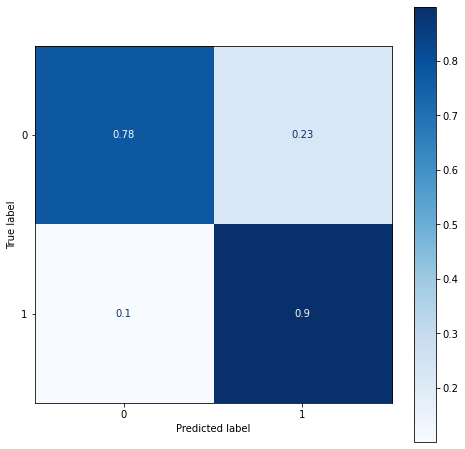

In [29]:
fig,ax=plt.subplots(figsize=(8,8))
plot_confusion_matrix(lr,x_train,y_train,normalize='true', cmap='Blues',ax=ax, display_labels=lr.classes_)